In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

Load the file regdataex.csv

In [2]:
df = pd.read_csv("regdataex.csv")

Use head, info and describe 

In [3]:
df.head()

,A,B,C,D,E,F,G,H,I,Target
0,20,39,-8,89,103,10,320,C,21,2637
1,46,39,6,45,102,10,109,B,17,4265
2,62,12,3,12,146,26,384,D,16,5906
3,33,45,-1,89,103,36,444,A,7,3326
4,29,28,-72,12,126,23,117,D,2,703


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
A         500 non-null int64
B         500 non-null int64
C         500 non-null int64
D         500 non-null int64
E         500 non-null int64
F         500 non-null int64
G         500 non-null int64
H         500 non-null object
I         500 non-null int64
Target    500 non-null int64
dtypes: int64(9), object(1)
memory usage: 39.2+ KB


In [5]:
df.describe()

,A,B,C,D,E,F,G,I,Target
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,39.920000,28.28000,-38.952000,372.830000,146.634000,20.200000,224.966000,11.020000,3040.658000
std,15.694273,10.39778,34.834416,1645.237636,28.975908,11.878307,135.069598,6.771951,1778.948155
min,14.000000,10.00000,-100.000000,-2000.000000,100.000000,0.000000,-20.000000,0.000000,-1221.000000
25%,26.000000,19.00000,-68.000000,20.000000,121.000000,10.000000,111.750000,5.000000,1604.750000
50%,40.000000,28.00000,-39.500000,65.000000,145.000000,20.000000,225.000000,11.000000,2980.500000
75%,54.000000,38.00000,-7.750000,99.000000,169.000000,30.000000,338.750000,17.000000,4398.750000
max,67.000000,45.00000,20.000000,6800.000000,200.000000,40.000000,450.000000,22.000000,7107.000000


Create a pair plot

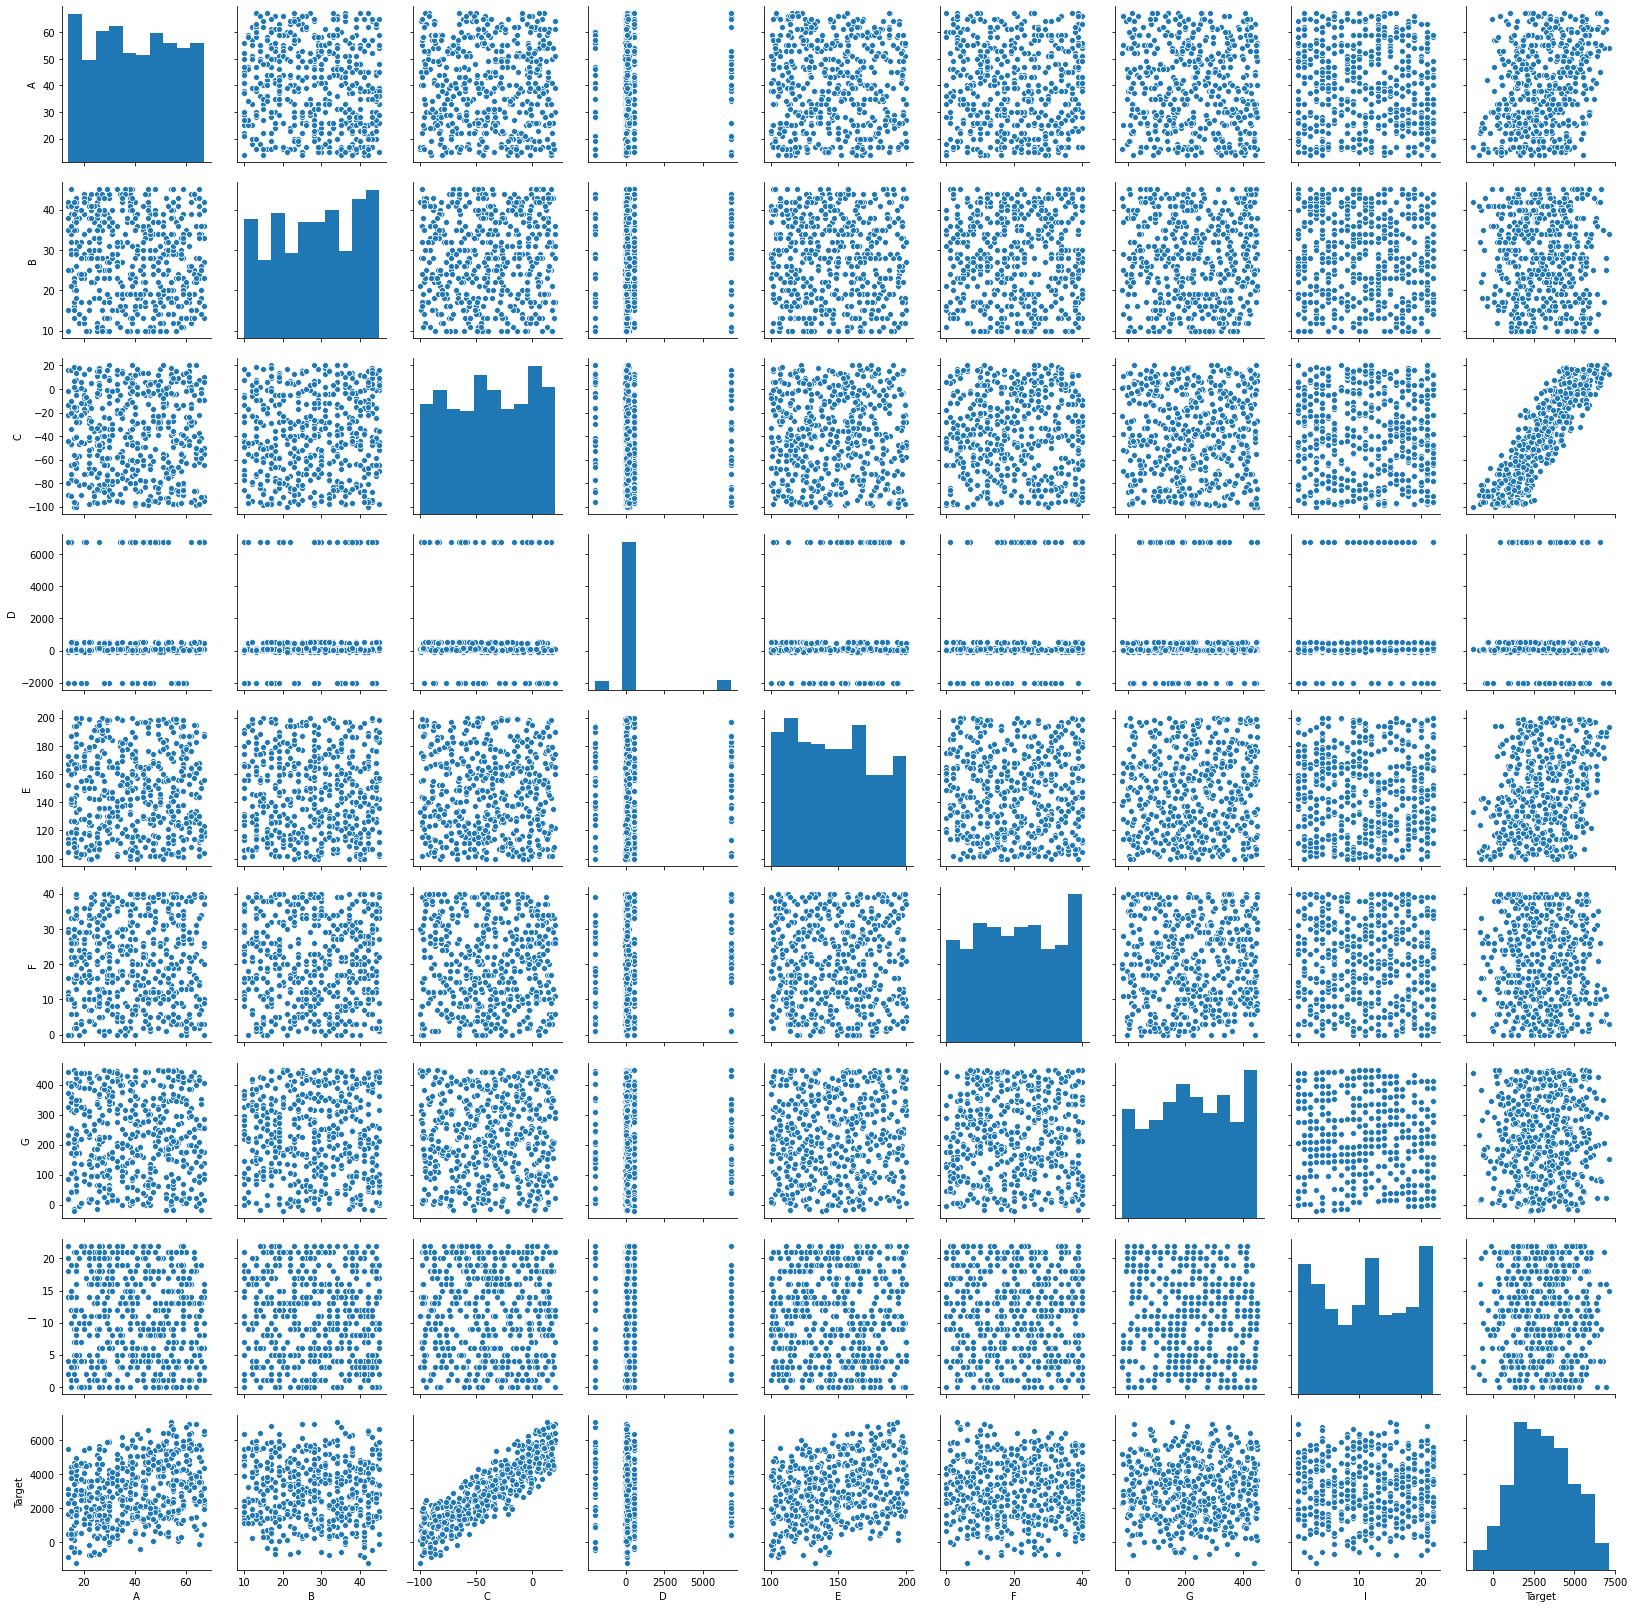

In [6]:
sb.pairplot(df)

Create a Linear Regression model:<br>
* split train and test
* check the results

In [7]:
import sklearn.linear_model as sl

In [8]:
import sklearn.model_selection as sm

In [9]:
X_train, X_test, y_train, y_test = sm.train_test_split(df.drop(['Target','H'],axis=1), df['Target'], test_size=0.33,random_state=101)

In [10]:
model = sl.LinearRegression()

In [11]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.coef_

array([ 3.44407489e+01, -1.92623180e+00,  4.46444172e+01,  1.33837310e-03,
        1.97675234e+01, -8.34870734e-01,  9.02150139e-02,  2.60544854e+00])

In [13]:
model.intercept_

523.4192868464329

In [14]:
pred = model.predict(X_test)

In [15]:
from sklearn import metrics

In [16]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

276.8878391490961

In [17]:
model.score(X_test,y_test)

0.9766959684247567

Try to reduce the dimensionality check the model with:<br>
* ['A', 'B', 'E', 'F', 'G', 'I']
* ['A', 'C', 'D', 'F', 'G', 'I']
* ['A', 'E', 'F', 'G', 'I']
* ['B', 'E', 'F']


In [18]:
X_train, X_test, y_train, y_test = sm.train_test_split(df[['A', 'B', 'E', 'F', 'G', 'I']], df['Target'], test_size=0.33,random_state=101)

In [19]:
model = sl.LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.13250254575241405

Use itertools.combination to find the minimum set of features to get a score > 0.95<br>
hint for using itertools:

In [20]:
import itertools

In [21]:
l = itertools.combinations([1,2,3,4],3)
for i in l:
    print(i)

(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)


In [22]:
for i in range(1,9):
    c = itertools.combinations("ABCDEFGI",i)
    for item in c:
        ls = list(item) 
        X_train, X_test, y_train, y_test = sm.train_test_split(df[ls], df['Target'], test_size=0.33,random_state=101)
        model = sl.LinearRegression()
        model.fit(X_train,y_train)
        score = model.score(X_test,y_test)
#         print(ls,score)
        if score > 0.95:
            print(ls,score)

['A', 'C', 'E'] 0.9766181091837871
['A', 'B', 'C', 'E'] 0.9767778382189207
['A', 'C', 'D', 'E'] 0.9766182074295001
['A', 'C', 'E', 'F'] 0.97647660002007
['A', 'C', 'E', 'G'] 0.976568004080962
['A', 'C', 'E', 'I'] 0.9767709844294518
['A', 'B', 'C', 'D', 'E'] 0.9767787020825072
['A', 'B', 'C', 'E', 'F'] 0.9766191062036725
['A', 'B', 'C', 'E', 'G'] 0.9767104610896946
['A', 'B', 'C', 'E', 'I'] 0.9769138183001518
['A', 'C', 'D', 'E', 'F'] 0.9764754631801837
['A', 'C', 'D', 'E', 'G'] 0.9765686769452984
['A', 'C', 'D', 'E', 'I'] 0.9767714581922881
['A', 'C', 'E', 'F', 'G'] 0.9764277255418515
['A', 'C', 'E', 'F', 'I'] 0.9766433059156397
['A', 'C', 'E', 'G', 'I'] 0.9767136345061034
['A', 'B', 'C', 'D', 'E', 'F'] 0.9766177934767017
['A', 'B', 'C', 'D', 'E', 'G'] 0.9767121621328043
['A', 'B', 'C', 'D', 'E', 'I'] 0.9769160628050271
['A', 'B', 'C', 'E', 'F', 'G'] 0.9765526365591527
['A', 'B', 'C', 'E', 'F', 'I'] 0.9767694039007344
['A', 'B', 'C', 'E', 'G', 'I'] 0.9768358101313805
['A', 'C', 'D', 'E